In [1]:
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import torch
from torch import nn
import torch.optim as optim
import torch.utils.data
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.utils as vutils
from tqdm import tqdm

/tmp/ipykernel_13913/2306550557.py:31: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  images_list = list(np.transpose(torch.from_numpy(self.load_image(p)), (2, 0, 1)) for p in sampled_images)


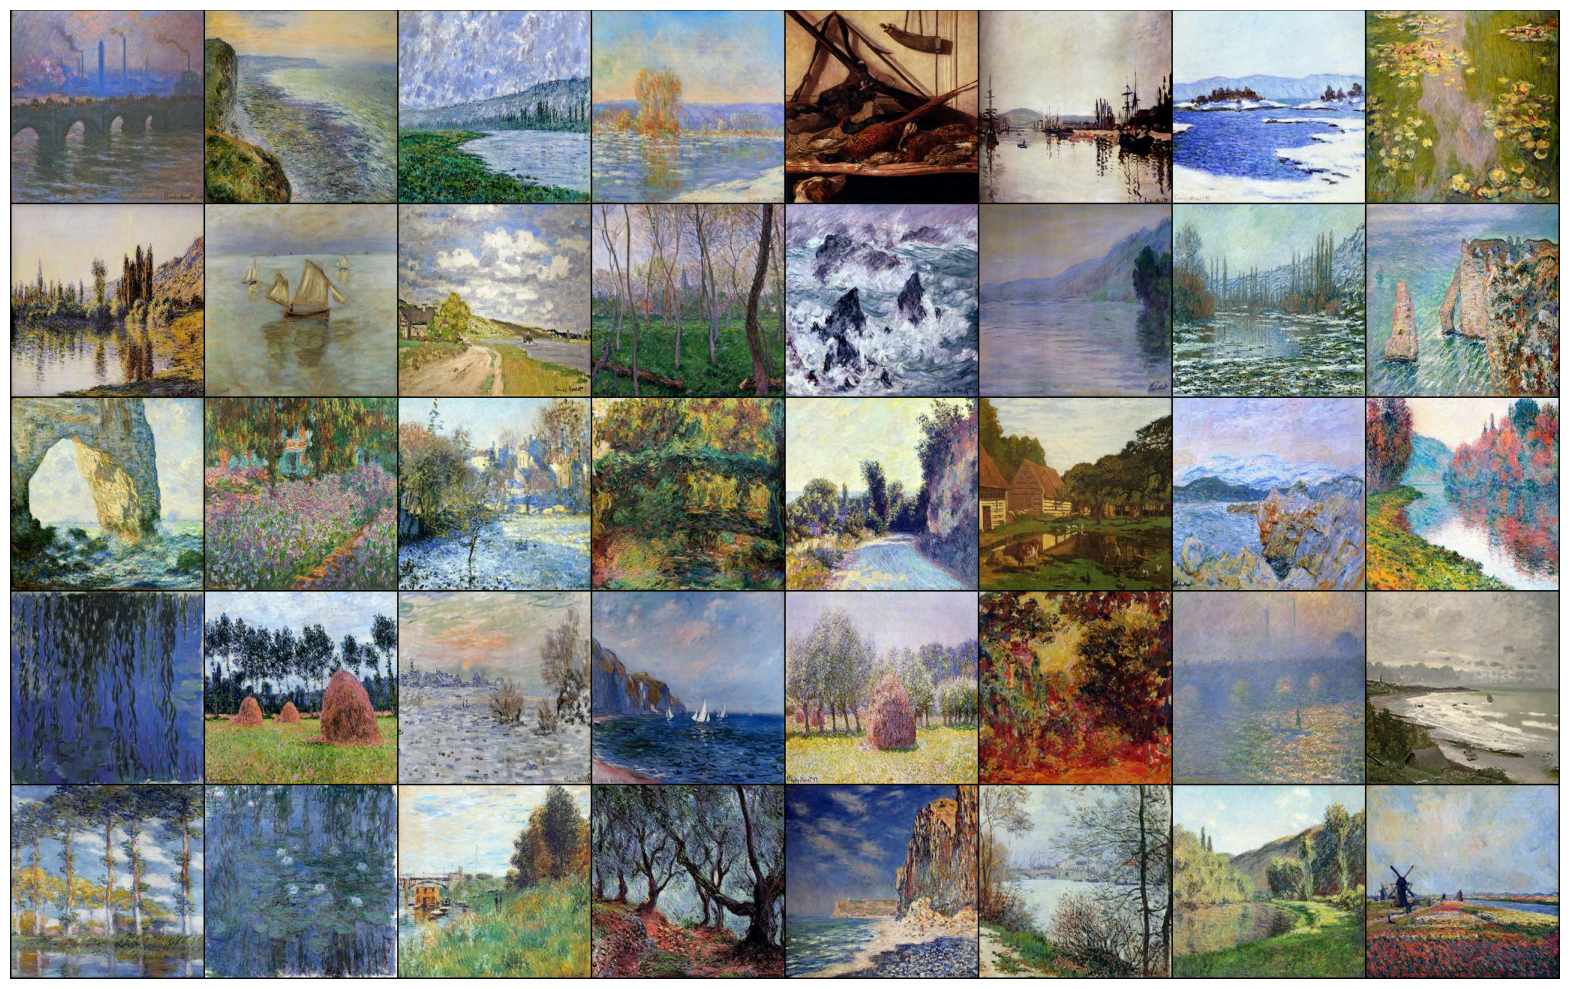

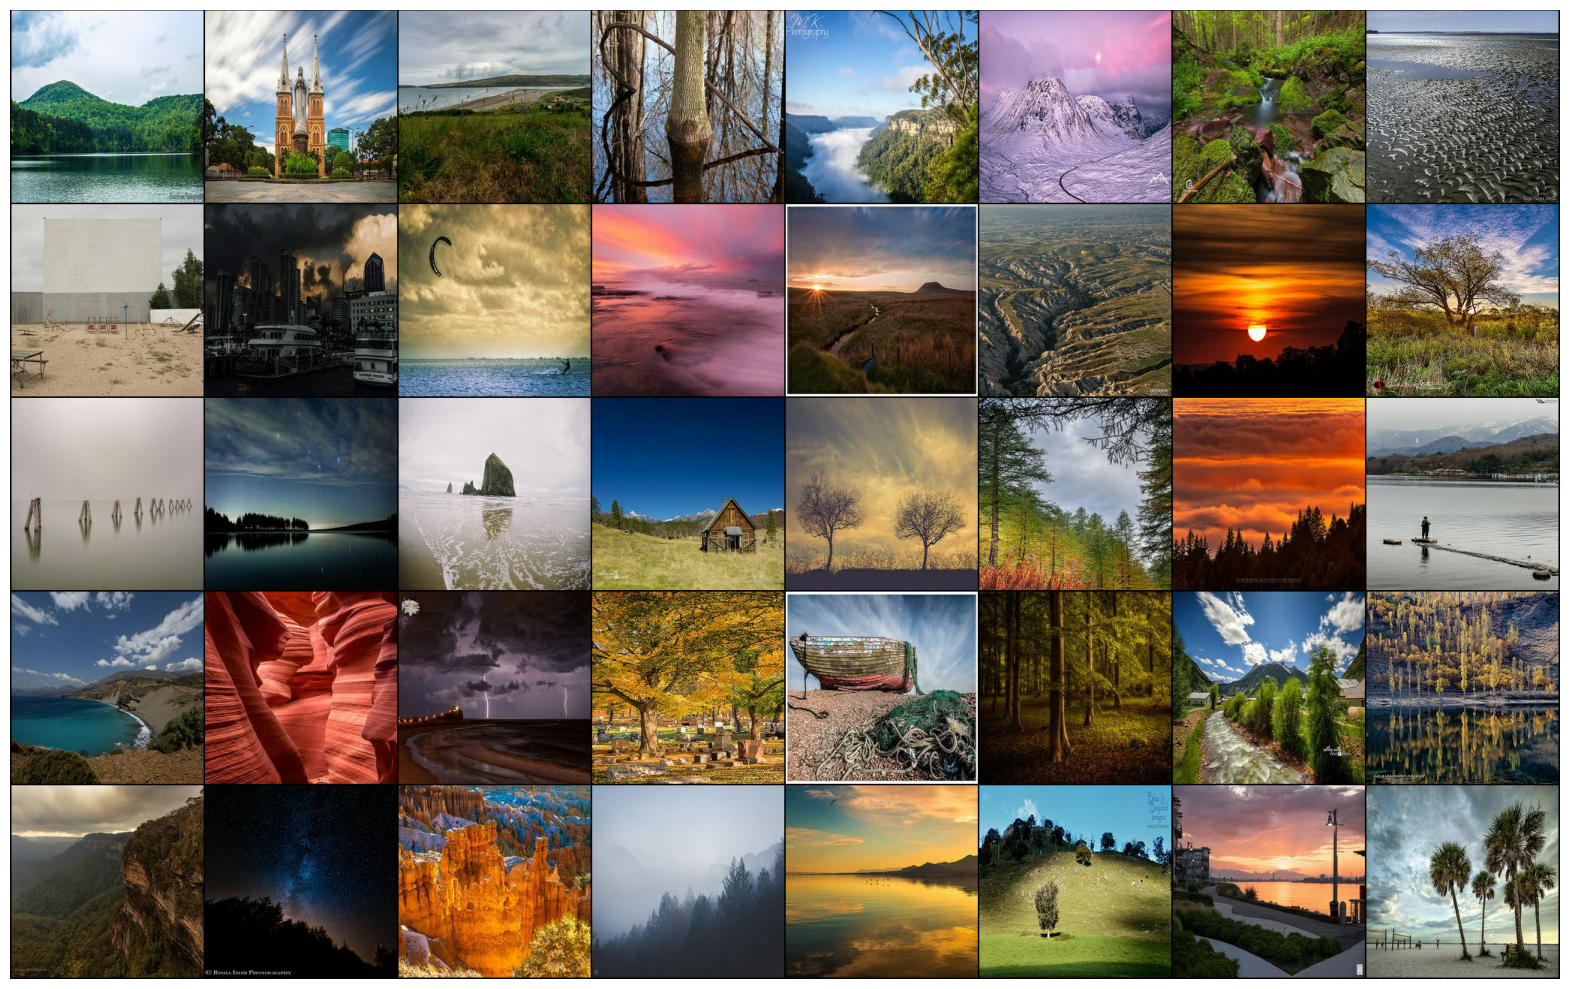

In [2]:
monet_ds = '../gan-getting-started/monet_jpg'
photo_ds = '../gan-getting-started/photo_jpg'

class ImageDataset(Dataset):
    """ Custom Dataset class """
    def __init__(self, root: str, transform: transforms.Compose):
        self.root = root
        self.transform = transform
        self.all_imgs = tuple(os.path.join(root, p) for p in os.listdir(root) if p.endswith('.jpg'))

    def __len__(self) -> int:
        return len(self.all_imgs)

    def __getitem__(self, idx: int) -> torch.Tensor:
        return self.transform(self.load_image(self.all_imgs[idx]))
    
    @staticmethod
    def load_image(path: str) -> np.ndarray:
        with Image.open(path) as p:
            img = np.asarray(p)
        return img


    def plot_random_images(self, n_img: int) -> None:
        # Sample random number of images
        sampled_images = random.sample(self.all_imgs, n_img)
        
        images_list = list(np.transpose(torch.from_numpy(self.load_image(p)), (2, 0, 1)) for p in sampled_images)
        image_grid = vutils.make_grid(images_list)
        plt.figure(figsize=(20, 20))
        plt.imshow(np.transpose(image_grid, (1, 2, 0)))
        plt.axis('off')
        plt.show()


monet_tensors = ImageDataset(root=monet_ds,
                            transform=transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                            ]))

photo_tensors = ImageDataset(root=photo_ds,
                            transform=transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                            ]))

monet_tensors.plot_random_images(40)
photo_tensors.plot_random_images(40)

In [3]:
print('Number of photos:', len(photo_tensors))
print('Number of monets:', len(monet_tensors))
print('Shape of images:', photo_tensors[0].shape)

Number of photos: 7038
Number of monets: 300
Shape of images: torch.Size([3, 256, 256])
